## Z-Transform and Discrete LTI Systems - Exercises
---

### Exercise 1

Consider the sequence
$$
f[n] = f_n = a^{n},\qquad a\in\mathbb{C},\,|a|<1
$$
(a) Sketch the sequence for $a=\frac{1}{2}$ and $a=-\frac{1}{2}$ for $0\leq n \leq 4$.

(b) Calculate the $z$-Transform $F(z)$.  Use
$$
\sum_{n=0}^{\infty} q^n = \frac{1}{1-q},\qquad |q|<1
$$
This last equation is a geometric series (https://en.wikipedia.org/wiki/Geometric_series).

### Solution 1
(a) As sketches we obtain:

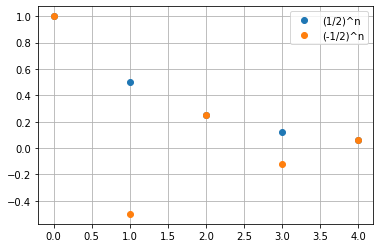

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0,5,1)
x1 = (0.5)**n
x2 = (-0.5)**n
plt.plot(n,x1,'o',label='(1/2)^n')
plt.plot(n,x2,'o',label='(-1/2)^n')
plt.legend()
plt.grid()


(b) We obtain
$$
\sum_{n=0}^{\infty} \left(\frac{a}{z}\right)^n = \frac{1}{1-\frac{a}{z}} = \frac{z}{z-a}
$$

### Exercise 2

Consider an $M$-Point moving average (MA) filter with the difference equation
$$
y[n] = \frac{1}{M}\left(x[n]+x[n-1]+\ldots + x[n-M+1]\right)
$$

> (a) Calculate the transfer function $H(z)$ for $M=2$.

> (b) Calculate and sketch the $|H(e^{i\Omega})|$ and $\phi(\Omega)$ for $\Omega\in [0,\pi]$.

### Solution 2

(a) We have 
$$
H(z) = \frac{1}{2}\frac{1+\frac{1}{z}}{1} = \frac{1}{2}\frac{z+1}{z}
$$
(b) We obtain
$$
H(e^{i\Omega}) = \frac{1}{2}\frac{e^{i\Omega}+1}{e^{i\Omega}} = e^{i\frac{\Omega}{2}}\frac{e^{i\frac{\Omega}{2}}+e^{-i\frac{\Omega}{2}}}{2} = e^{-i\frac{\Omega}{2}}\cos(\frac{\Omega}{2})
$$
Hence we have
$$
|H(e^{i\Omega})| = \cos(\frac{\Omega}{2})
$$
and 
$$
\phi(\Omega) = -\frac{\Omega}{2}
$$
We plot both functions:

In [18]:
sys_M_point

TransferFunctionDiscrete(
array([0.5, 0.5]),
array([1., 0.]),
dt: True
)

Text(0, 0.5, 'phi(Omega)')

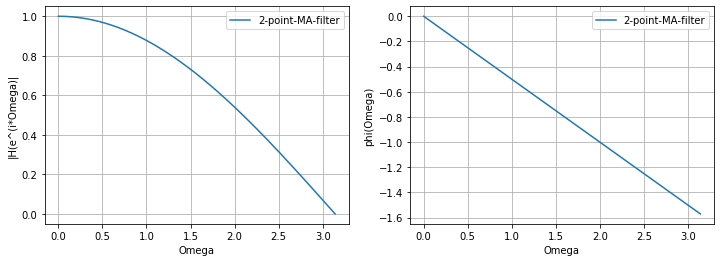

In [17]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

M = 2
b = [0.5,0.5] # np.ones(M)*1/M
a = [1,0] # np.zeros(M)
sys_M_point = signal.TransferFunction(b,a,dt=True)
w, H = signal.dfreqresp(sys_M_point)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(w,np.abs(H),label='{}-point-MA-filter'.format(M))
plt.legend()
plt.grid()
plt.xlabel('Omega')
plt.ylabel('|H(e^(i*Omega)|')
plt.subplot(1,2,2)
plt.plot(w,np.angle(H),label='{}-point-MA-filter'.format(M))
plt.legend()
plt.grid()
plt.xlabel('Omega')
plt.ylabel('phi(Omega)')